In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(11)

In [2]:
data = pd.read_csv(r'C:\Users\Arbaj\Desktop\Demo Datasets\Lesson 4\Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data.shape

(200, 4)

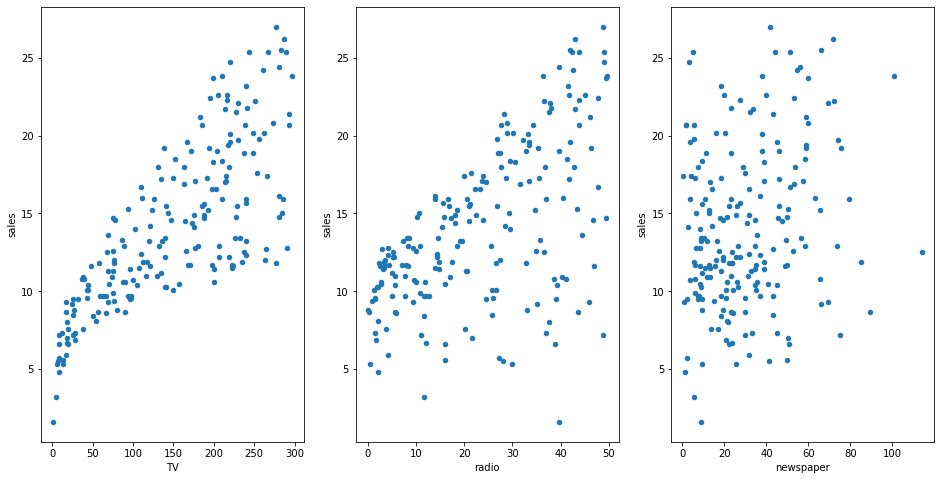

In [5]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

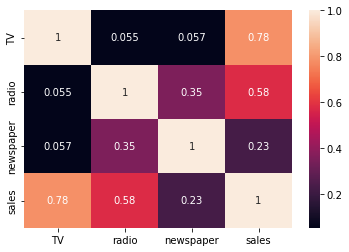

In [6]:
sns.heatmap(data.corr(), annot = True);

In [7]:
features = data[['TV']].values
target = data[['sales']].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 6)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [11]:
# X_train = X_train.reshape(150,-1)
# X_train.shape

In [12]:
# X_test = X_test.reshape(50,-1)
# X_test.shape

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
my_first_model = LinearRegression()

At this stage my m and c values are initialized to some random value. We need to train the model to find the optimal value of the weights(parameters) of the Linear Regression model.

In [15]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [16]:
my_first_model.coef_

array([[0.04873499]])

In [17]:
my_first_model.intercept_

array([6.70910349])

Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in Sales

OR 

An additional 1000 $ spent on TV was associated with an increase in sales of 48.734 units 

y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on TV is $50,000. I want you to tell me the sales generated due to this spend

In [18]:
.048*50 + 6.709

9.109

Lets try to plot best fit line

In [19]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [20]:
preds = my_first_model.predict(X_new)

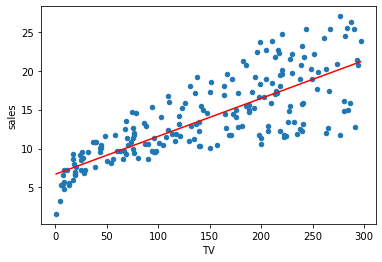

In [21]:
data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new,preds,c='red');

In [22]:
import statsmodels.formula.api as smf

In [23]:
my_stat_model = smf.ols(formula='sales ~ TV', data=data).fit()
my_stat_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

H0 : There is no relationship between independent(TV) variable and dependent(sales) variable

H1 : There is a relationship between independent(TV) variable and dependent(Sales) variable

if my p value for TV is less than .05 then I will reject the null hypothesis

In [24]:
my_stat_model.rsquared

0.611875050850071

To complete the supervised learning flow follow the below steps after fitting the model

In [25]:
my_model_preds = my_first_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
#MAE
mean_absolute_error(my_model_preds,y_test)

2.469197684055691

In [28]:
#MSE
mean_squared_error(my_model_preds,y_test)

9.503191696866343

In [29]:
#RMSE
np.sqrt(mean_squared_error(my_model_preds,y_test))

3.0827247196054244

### Multiple Linear Regression

In [30]:
features = data[['TV','radio','newspaper']]
target = data[['sales']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 10, train_size = .80)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [33]:
my_multiple_linear_model = LinearRegression()

In [34]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [35]:
my_multiple_linear_model.coef_

array([[ 0.0437726 ,  0.19343299, -0.00222879]])

In [36]:
my_multiple_linear_model.intercept_

array([3.25409711])

In [37]:
my_multiple_linear_model.score(X_train, y_train)

0.9209087553499528

In [38]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)

In [39]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
mean_absolute_error(my_multiple_linear_preds_train,y_train)

1.0661435033472695

In [40]:
mean_absolute_error(my_multiple_linear_preds,y_test)

1.8850130310423154

In [41]:
mean_squared_error(my_multiple_linear_preds,y_test)

6.700486756528873

In [42]:
my_ols_model = smf.ols(formula='sales ~ TV + radio + newspaper', data = data).fit()

In [43]:
my_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        17:22:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#2. Build a model on training data

from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [45]:
my_enet_model = ElasticNet()

In [46]:
my_enet_model.fit(X_train, y_train)

ElasticNet()

In [47]:
y_pred = my_enet_model.predict(X_test)

In [48]:
mean_squared_error(y_test, y_pred)

6.679791828361348

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {'alpha':[0.01, 0.1, 0.2, 0.5, 0.8, 1], 'l1_ratio':[0, 0.3, 0.5, 0.7, 1]}
grid_search = GridSearchCV(my_enet_model, params, cv = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.5, 0.8, 1],
                         'l1_ratio': [0, 0.3, 0.5, 0.7, 1]})

In [51]:
grid_search.best_params_

{'alpha': 0.8, 'l1_ratio': 1}

In [52]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [53]:
data['column1'] = np.random.randn(len(data))
data['column2'] = np.random.randint(len(data))
data['column3'] = np.random.normal(len(data))

In [54]:
data

,TV,radio,newspaper,sales,column1,column2,column3
1,230.1,37.8,69.2,22.1,-0.029285,156,200.248634
2,44.5,39.3,45.1,10.4,-0.382591,156,200.248634
3,17.2,45.9,69.3,9.3,-0.575038,156,200.248634
4,151.5,41.3,58.5,18.5,1.620944,156,200.248634
5,180.8,10.8,58.4,12.9,-0.318899,156,200.248634
...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,-0.104331,156,200.248634
197,94.2,4.9,8.1,9.7,0.767506,156,200.248634
198,177.0,9.3,6.4,12.8,-1.641285,156,200.248634
199,283.6,42.0,66.2,25.5,-1.398924,156,200.248634


In [55]:
Perform MLR using TV, radio, newspaper, column1 and column2 as features. And sales as target

SyntaxError: invalid syntax (Temp/ipykernel_8556/3309548948.py, line 1)